In [2]:
import os
import fnmatch
import matplotlib.pyplot as plt # after importting matplotlib, mayavi can not set api to 2: first run mayavi!!!!
from latexify import latexify
import numpy as np

The simulations are done in the Mctas_script.ipynb

# Plot constant Q scans for the magnon_bcc
(hhl) palne, J1=0.2, T=30K, a=4.95

## Magnon dispersion

In [9]:
# Define functions

def omeaga_q(q_vec, J1=1, J2=0, D=0, s=1, FM=1):
    '''
    Parameters:
        q_vec: q vector in the unit of the receprocal lattice
        J1: nn exchange constant
        J2: nnn exchange constant
        s: spin size
        a: lattice constant
        FM: 1 for FM, 0 for AFM

    '''
    
    pi2 = 2*np.pi
    qx, qy, qz = q_vec

    J10=8*J1
    J1q=2*J1*(np.cos(np.pi*(qx+qy+qz))+np.cos(np.pi*(qx+qy-qz))+np.cos(np.pi*(qx-qy+qz))+np.cos(np.pi*(qx-qy-qz)))
    J20=6*J2
    J2q=2*J2*(np.cos(pi2*qx)+np.cos(pi2*qy)+np.cos(pi2*qz))

    if FM==1:
        Omega_magnon = s*((J10+J20)-(J1q+J2q))+D*(2*s+1)
    else:
        tmp = (s*J10-s*J20+s*J2q+D*(2*s-1))*(s*J10-s*J20+s*J2q+D*(2*s-1))-s*s*J1q*J1q
        Omega_magnon = np.sqrt(tmp)

    return Omega_magnon    

def load_qe_simu(Qs, folder, subfolder, q_info, nE, halfE):
    
    nQ = len(Qs)

    Es = np.array([omeaga_q(Q, J1=0.2, J2=0, D=0, s=1, FM=1) for Q in Qs])

    data = []
    temp = np.full((nE,3), np.nan)
    for ii, (Q, E) in enumerate(zip(Qs,Es)):
        es = np.linspace(E-halfE, E+halfE, nE, endpoint=True)
        
        for jj, e in enumerate(es):
            f = folder + subfolder.format(q_info[ii],e).replace('.','p') + '/detector.dat'
            temp[jj,0] = e
            temp[jj,1:] = load_a_0dArray_data(f, skip_header=51, debug=False)
            
        data.append(np.array(temp))
        
    return data

def load_a_0dArray_data(path, skip_header=51, debug=False):
    try:
        dat = np.genfromtxt(path, skip_header=skip_header,usecols=[0,1])
        return dat
    except Exception as e:
        if debug:
            print(e)
            #raise(e)
            
def plot_qe_simu(data, q_info, skip_idx, leg_title, e_at_q_theory=None):
    
    if len(e_at_q_theory)==len(q_info):
        plot_theory = True
    else:
        plot_theory = False
        
    plt.figure()
    for idx, dat in enumerate(data):
        if idx in skip_idx:
            continue
        ebar = plt.errorbar(dat[:,0], dat[:,1], dat[:,2],label='{:1.1f}'.format(q_info[idx]))
        
        if plot_theory:
            #plt.axvline(x=Es[idx],c=ebar[0].get_color())
            plt.scatter(x=e_at_q_theory[idx], y=np.nanmax(dat[:,1])*1.15, color=ebar[0].get_color())
        
    plt.legend(title=leg_title,loc=1)
    plt.xlabel('Energy (meV)')
    plt.ylabel('Intensity')
    #plt.text(0.7,3000,'Vertial lines:\ntheretical magnon energy')
    plt.text(0.4,0.8,'Dots:\ntheretical magnon energy', transform=plt.gca().transAxes)
    plt.show()
    return

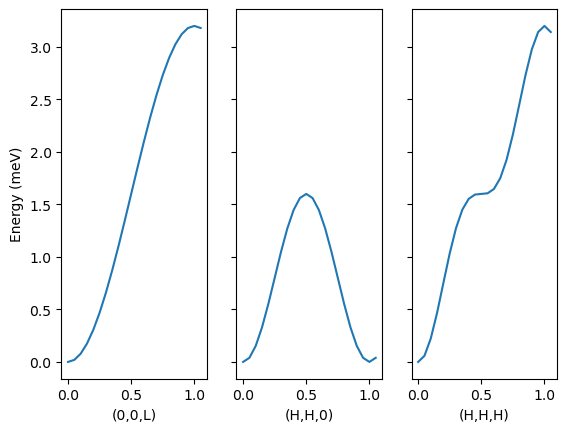

In [4]:
# Plot the thoeretical disperson along the three directions
qs = np.arange(0,1.1,0.05)
e1 = [omeaga_q([0,0,q], J1=0.2, J2=0, D=0, s=1, FM=1) for q in qs]
e2 = [omeaga_q([q,q,0], J1=0.2, J2=0, D=0, s=1, FM=1) for q in qs]
e3 = [omeaga_q([q,q,q], J1=0.2, J2=0, D=0, s=1, FM=1) for q in qs]

ess = [e1,e2,e3]
xlabels = ['(0,0,L)', '(H,H,0)', '(H,H,H)']

fig, axs = plt.subplots(nrows=1,ncols=3, sharey=True)
for idx, (ax, es) in enumerate(zip(axs, ess)):
    ax.plot(qs, es)
    ax.set_xlabel(xlabels[idx])
    if idx==0:
        ax.set_ylabel('Energy (meV)')
#fig.savefig(r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans/magon_bcc_dispersion_theory.pdf',
#            bbox_inches="tight")
plt.show()

## Plot data along three Q
Simulation with q range 0.0-1.0. Some simulations are failed (data file not found) because for the extram Q and E, a3 and a4 is nan

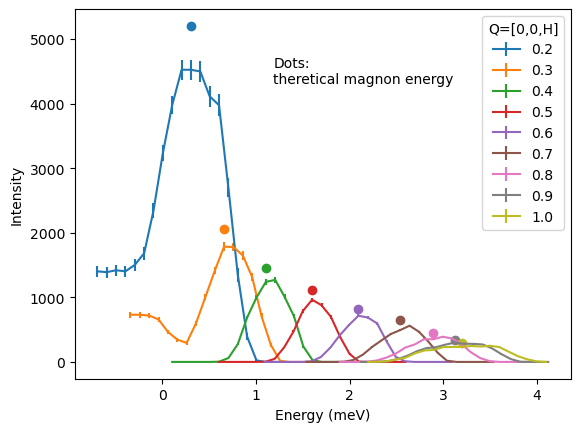

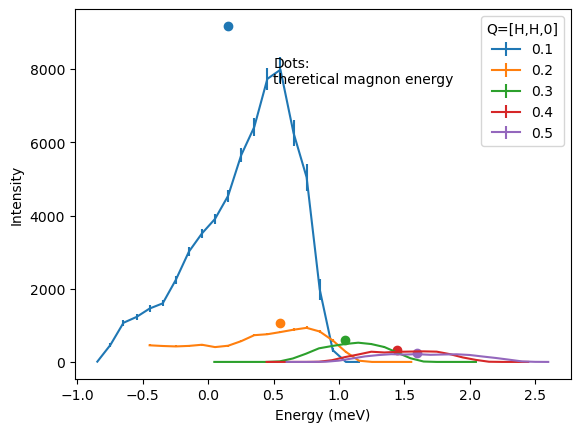

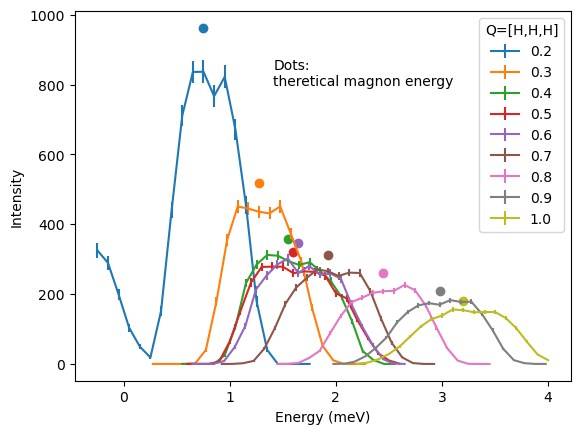

In [10]:
qs = np.linspace(0.0, 1.0, 11, endpoint=True)

Q00h = np.vstack([np.zeros([2,11]), qs]).T; 
E00h = [omeaga_q(Q, J1=0.2, J2=0, D=0, s=1, FM=1) for Q in Q00h]

Qhh0 = np.vstack([np.tile(qs,(2,1)), np.zeros_like(qs)]).T; 
Ehh0 = [omeaga_q(Q, J1=0.2, J2=0, D=0, s=1, FM=1) for Q in Qhh0]

Qhhh = np.tile(qs,(3,1)).T; 
Ehhh = [omeaga_q(Q, J1=0.2, J2=0, D=0, s=1, FM=1) for Q in Qhhh]

Qs = [Q00h, Qhh0, Qhhh]

folder  = r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans'
subfolders = [r'\Q00h_h{:1.2f}_e{:1.3f}meV', r'\Qhh0_h{:1.2f}_e{:1.3f}meV', r'\Qhhh_h{:1.2f}_e{:1.3f}meV']

data = load_qe_simu(Qs=Qs[0], folder=folder, subfolder=subfolders[0], q_info=qs, nE=21, halfE=1.0)
plot_qe_simu(data, q_info=qs, skip_idx=[0,1], leg_title='Q=[0,0,H]',e_at_q_theory=E00h)
# plt.gcf().savefig(r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans/magon_bcc_dispersion_00L_McStas.pdf',
#                   bbox_inches="tight",pad_inches=0.01)

data = load_qe_simu(Qs=Qs[1], folder=folder, subfolder=subfolders[1], q_info=qs, nE=21, halfE=1.0)
plot_qe_simu(data, q_info=qs, skip_idx=[0,6,7,8,9,10], leg_title='Q=[H,H,0]',e_at_q_theory=Ehh0)
# plt.gcf().savefig(r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans/magon_bcc_dispersion_HH0_McStas.pdf',
#                  bbox_inches="tight",pad_inches=0.01)

data = load_qe_simu(Qs=Qs[2], folder=folder, subfolder=subfolders[2], q_info=qs, nE=21, halfE=1.0)
plot_qe_simu(data, q_info=qs, skip_idx=[0,1], leg_title='Q=[H,H,H]', e_at_q_theory=Ehhh)
# plt.gcf().savefig(r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans/magon_bcc_dispersion_HHH_McStas.pdf',
#                   bbox_inches="tight",pad_inches=0.01)


## Plot along (H,H,0) direction

In [11]:
folder  = r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans'
subfolder = r'\Qhh0_h{:1.2f}_e{:1.3f}meV'

Qs = np.linspace(0., 1.0, 11, endpoint=True)
Es = np.array([omeaga_q([Q,Q,0], J1=0.2, J2=0, D=0, s=1, FM=1) for Q in Qs])

data = []
temp = np.zeros([21,3])
for Q, E in zip(Qs,Es):
    es = np.linspace(E-1, E+1, 21, endpoint=True)
    for idx, e in enumerate(es):
        f = folder + subfolder.format(Q,e).replace('.','p') + '/detector.dat'
        temp[idx,0] = e
        temp[idx,1:] = load_a_0dArray_data(f, skip_header=51)
        #print(f, temp[idx,:])
    data.append(np.array(temp))

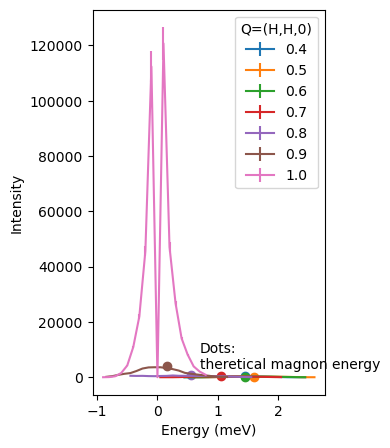

In [12]:
plt.figure(figsize=(3,5))
for idx, dat in enumerate(data):
    if idx<=3:
        continue
    ebar = plt.errorbar(dat[:,0], dat[:,1], dat[:,2],label='{:1.1f}'.format(Qs[idx],Qs[idx]))
    #plt.axvline(x=Es[idx],c=ebar[0].get_color())
    plt.scatter(x=Es[idx], y=dat[:,1].max()*1.15,color=ebar[0].get_color())
plt.legend(title='Q=(H,H,0)')
plt.xlabel('Energy (meV)')
plt.ylabel('Intensity')
#plt.text(0.7,3000,'Vertial lines:\ntheretical magnon energy')
plt.text(0.7,3000,'Dots:\ntheretical magnon energy')
#plt.gcf().savefig(r'D:\5_Instrument\Mira\Mira_Bender\Mira_McStas_Model\magnon_bcc_constantQscans/magon_bcc_dispersion_HH0_McStas.pdf',
#                  bbox_inches="tight",pad_inches=0.01)
plt.show()